### Fourier Transform element-wise matrix multiplication concept proof

In [110]:
%matplotlib inline

import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
from scipy import ndimage

### Read an Image as grayscale

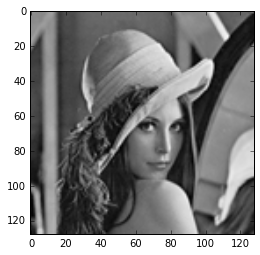

In [111]:
face = misc.imread('lena128.jpg', 'L')

plt.imshow(face, cmap=plt.cm.gray)
plt.show()

### FFT section
- left picture do the FFT and plot
- right picture do the IFFT of the left picture

C:\SciSoft\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
C:\SciSoft\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: ComplexWarning: Casting complex values to real discards the imaginary part


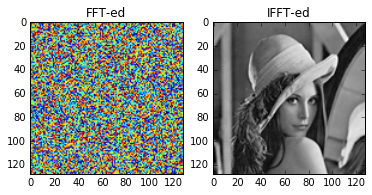

In [112]:
face_fft = np.fft.fft2(face)
plt.subplot(121)
plt.title("FFT-ed")
plt.imshow(face_fft.astype(np.uint8))

face_ifft = np.fft.ifft2(face_fft)
plt.subplot(122)
plt.title("IFFT-ed")
plt.imshow(face_ifft.astype(np.uint8), cmap=plt.cm.gray)

### Generating kernel & Convolve in Time space

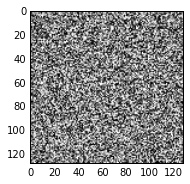

In [113]:
k = np.random.randint(low=-5, high=5, size=(128,128))
plt.subplot(122)
plt.imshow(k, cmap=plt.cm.gray)
plt.show()

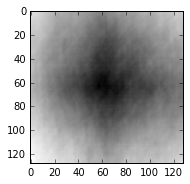

In [114]:
face_conv = ndimage.convolve(face, k, mode='constant', cval=0.0)
plt.subplot(121)
plt.imshow(face_conv, cmap=plt.cm.gray)
plt.show()

### FFT the kernel 

C:\SciSoft\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
C:\SciSoft\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: ComplexWarning: Casting complex values to real discards the imaginary part


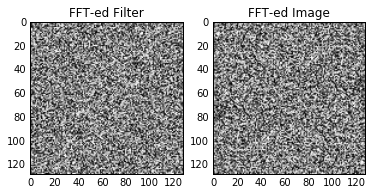

In [115]:
k_fft = np.fft.fft2(k)
plt.subplot(121)
plt.title("FFT-ed Filter")
plt.imshow(k_fft.astype(np.uint8), cmap=plt.cm.gray)

plt.subplot(122)
plt.title("FFT-ed Image")
plt.imshow(face_fft.astype(np.uint8), cmap=plt.cm.gray)

### element-wise multiplication in K-space

In [121]:
print(face_fft[5][5])
print(k_fft[5][5])
print(face_fft_ew[5][5])

(15168.1297886+6558.94193333j)
(85.7686274446-82.2334299192j)
(1840313.96469-684775.890864j)


(<type 'numpy.ndarray'>, <type 'numpy.ndarray'>)


C:\SciSoft\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: ComplexWarning: Casting complex values to real discards the imaginary part


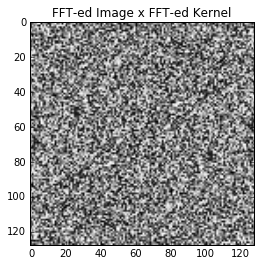

In [116]:
face_fft_ew = face_fft * k_fft
plt.title("FFT-ed Image x FFT-ed Kernel")
plt.imshow(face_fft_ew.astype(np.uint8), cmap=plt.cm.gray)

## invert back to Time space

C:\SciSoft\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


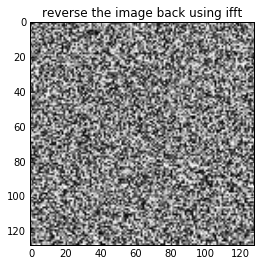

In [117]:
face_ifft_ew = np.fft.ifft2(face_fft_ew)
plt.title("reverse the image back using ifft")
plt.imshow(face_ifft_ew.astype(np.uint8), cmap=plt.cm.gray)

# Scratch Pad